# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

*1. Загрузите данные из файла в датафрейм.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('C://Users/mrsag/Downloads/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

*2. Изучите общую информацию о полученном датафрейме.*

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


*3. Постройте общую гистограмму для всех числовых столбцов таблицы.*

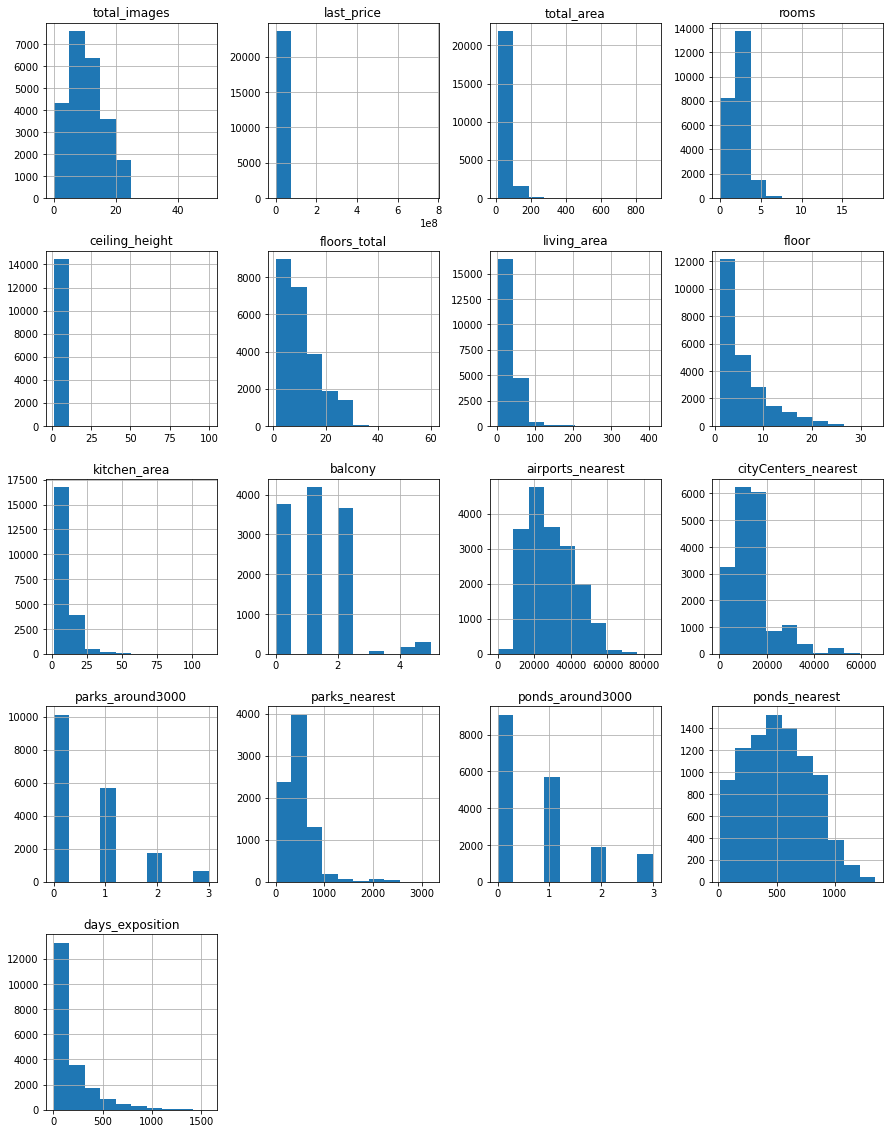

In [6]:
data.hist(figsize=(15,20));

По данным таблицы я вижу проблемы с данными:  

    1. Пропуски в столбцах: ceiling_height, living_area, is_apartment, kitchen_area, balcony, parks_nearest, ponds_nearest,            days_exposition  
    2. Дубликаты в столбце locality_name  
    3. Неверный тип данных: first_day_exposition  
    4. Странные значения: ceiling_height - 100м, living_area - 2 кв м   
    5. Неверное наименование столбцов: parks_around3000, ponds_around3000, cityCenters_nearest


### Предобработка данных

*1. Найдите и изучите пропущенные значения в столбцах:*

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
data.isna().mean().sort_values(ascending=False)*100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

Если есть пропуски в столбце балконы, можно заменить их на 0, в столбце высота потолков-медианой

In [9]:
data['balcony'] = data['balcony'].fillna(0)

In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

*2. Рассмотрите типы данных в каждом столбце*

In [11]:
data = data.rename(columns={'parks_around3000':'parks_around_3000', 
             'ponds_around3000':'ponds_around_3000', 
             'cityCenters_nearest':'city_centers_nearest'})

Привели столбцы в нижний и "змеиный" регистр

Так как стоблец first_day_exposition был в формате object, его необходимо заменить в формат даты, balcony - на тип целые числа

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [13]:
data['balcony'] = data['balcony'].astype(int)

*3. Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты*

In [14]:
data.duplicated().sum()

0

Явных дубликатов нет

In [15]:
set(data['locality_name'].unique())

{nan,
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'г

In [16]:
data.locality_name = data.locality_name.str.replace('ё', 'е') 
data.locality_name = data.locality_name.str.replace('поселок городского типа', 'поселок') 
data.locality_name = data.locality_name.str.replace('городской поселок', 'поселок')
set(data['locality_name'].unique())

{nan,
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинк

Устранили неявные дубликаты

*4. Найдите и устраните редкие и выбивающиеся значения*

In [17]:
data.query('living_area<5')['living_area'].count()


4

Так как жилая площадь менее 5 кв м выглядит аномальной, и таких значений всего 4 - удалим эти строки

In [18]:
data.drop(index=data.query('living_area<5').index,inplace=True)

In [19]:
data['ceiling_height'] = data['ceiling_height'].replace('25', '2,5')
data['ceiling_height'] = data['ceiling_height'].replace('32', '3,2')

Можно предположить, что 25 и 32 - это ошибка, восстановили корректное значение

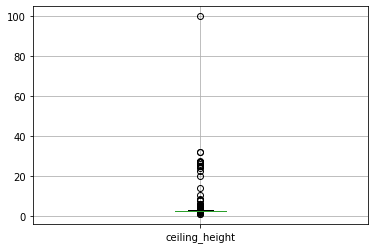

In [20]:
data.boxplot(['ceiling_height']);

In [21]:
(data.query('ceiling_height>50')['ceiling_height'].count()/data['ceiling_height'].count())*100

0.00422029964127453

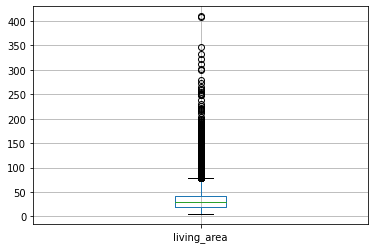

In [22]:
data.boxplot(['living_area']);

In [23]:
(data.query('living_area>250')['living_area'].count()/data['living_area'].count())*100

0.06424375917767988

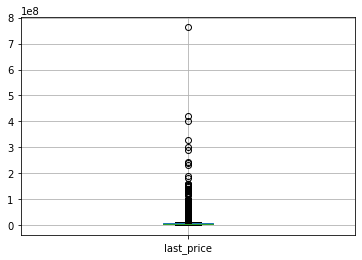

In [24]:
data.boxplot(['last_price']);

In [25]:
(data.query('last_price>200000000')['last_price'].count()/data['last_price'].count())*100

0.03798269677147077

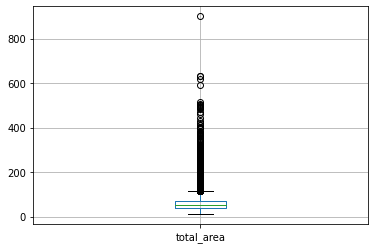

In [26]:
data.boxplot(['total_area']);

In [27]:
(data.query('total_area>500')['total_area'].count()/data['total_area'].count())*100

0.029542097488921712

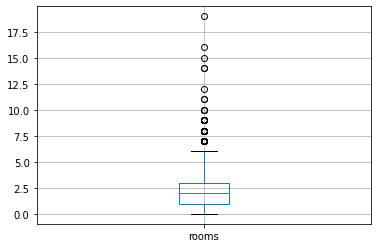

In [28]:
data.boxplot(['rooms']);

In [29]:
(data.query('rooms>10')['rooms'].count()/data['rooms'].count())*100

0.03376239713019624

По данным исследования можно удалить выбросы, т.к. они составляют менее 1%

In [30]:
data.drop(index=data.query('rooms>10').index,inplace=True)
data.drop(index=data.query('ceiling_height>50').index,inplace=True)
data.drop(index=data.query('living_area>250').index,inplace=True)
data.drop(index=data.query('total_area>500').index,inplace=True)
data.drop(index=data.query('last_price>200000000').index,inplace=True)

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23667.0,9.856298e+00,5.680083e+00,0.0,6.00,9.00,14.000,50.0
last_price,23667.0,6.359660e+06,7.610391e+06,12190.0,3400000.00,4644000.00,6760000.000,190870000.0
total_area,23667.0,5.993665e+01,3.304428e+01,12.0,40.00,52.00,69.700,500.0
rooms,23667.0,2.063675e+00,1.049019e+00,0.0,1.00,2.00,3.000,10.0
ceiling_height,23667.0,2.719561e+00,7.598862e-01,1.0,2.60,2.65,2.700,32.0
floors_total,23581.0,1.067792e+01,6.598143e+00,1.0,5.00,9.00,16.000,60.0
living_area,21766.0,3.422041e+01,2.061870e+01,5.0,18.60,30.00,42.245,250.0
floor,23667.0,5.891494e+00,4.884534e+00,1.0,2.00,4.00,8.000,33.0
kitchen_area,21391.0,1.053287e+01,5.749797e+00,1.3,7.00,9.10,12.000,107.0
balcony,23667.0,5.912029e-01,9.591039e-01,0.0,0.00,0.00,1.000,5.0


### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра

In [32]:
data['price_metr'] = data['last_price']/data['total_area']

День недели публикации объявления

In [33]:
data['weekday'] = data['first_day_exposition'].dt.weekday

Месяц публикации объвления

In [34]:
data['month'] = data['first_day_exposition'].dt.month

Год публикации обявления

In [35]:
data['year'] = data['first_day_exposition'].dt.year

Тип этажа квартиры

In [36]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

Расстояние до центра города в километрах

In [37]:
data['center_distance'] = round(data['city_centers_nearest']/1000)

Откроем таблицу с новыми столбцами

In [38]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_metr,weekday,month,year,floor_type,center_distance
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

*1. Параметры объектов*

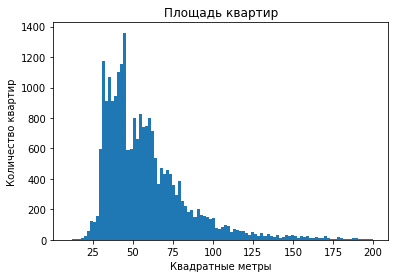

In [39]:
plt.hist(data['total_area'], bins=100, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

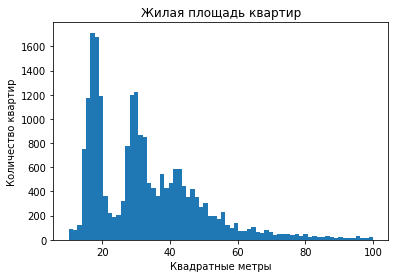

In [40]:
plt.hist(data['living_area'], bins=70, range=(10,100))
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()


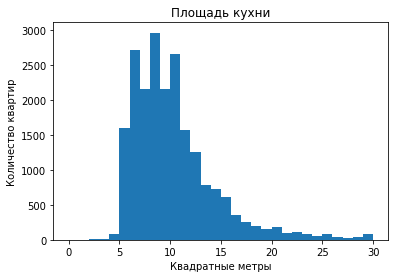

In [41]:
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()


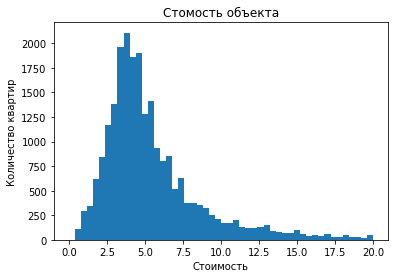

In [42]:
data['last_price'] = data['last_price']/1000000
plt.hist(data['last_price'], bins = 50, range=(0,20))
plt.title('Стомость объекта')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

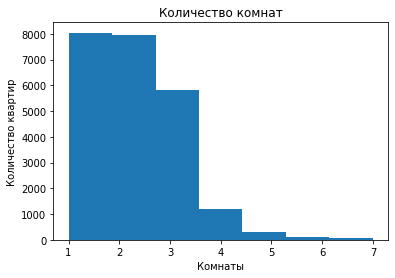

In [43]:
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество квартир')
plt.show()


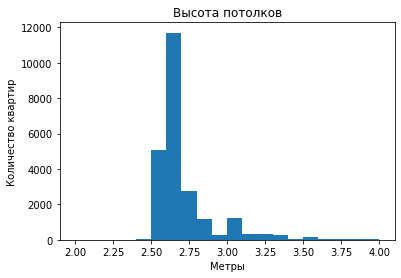

Наибольшие по высоте потолков варианты:
22336    32.0
3148     32.0
21377    27.5
5246     27.0
17857    27.0
5807     27.0
21824    27.0
10773    27.0
22938    27.0
20478    27.0
Name: ceiling_height, dtype: float64


In [44]:
plt.hist(data['ceiling_height'], bins=20, range=(2,4))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

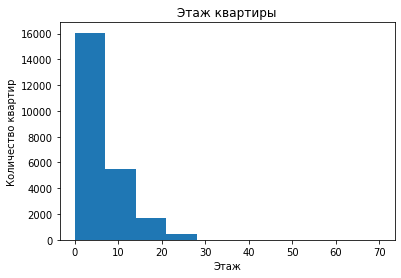

Наибольшие по номеру этажа варианты:
18218    33
11575    32
18629    31
1917     30
11079    29
397      28
113      27
2629     27
4091     27
12888    27
Name: floor, dtype: int64


In [45]:
plt.hist(data['floor'], range=(0,70))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по номеру этажа варианты:')
print(data['floor'].sort_values(ascending=False).head(10))

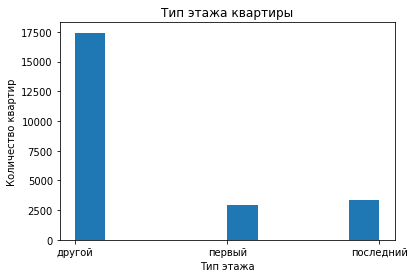

In [46]:
plt.hist(data['floor_type'], bins=10)
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

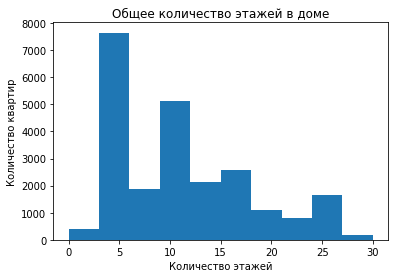

Наибольшие по количеству этажей варианты:
2253     60.0
16731    52.0
16934    37.0
11079    36.0
397      36.0
5807     36.0
21599    35.0
1060     35.0
12888    35.0
20938    35.0
Name: floors_total, dtype: float64


In [47]:
plt.hist(data['floors_total'], range=(0,30))
plt.title('Общее количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по количеству этажей варианты:')
print(data['floors_total'].sort_values(ascending=False).head(10))

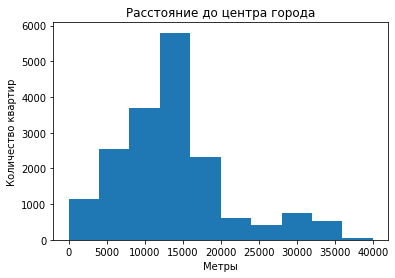

In [48]:
plt.hist(data['city_centers_nearest'], range=(0,40000))
plt.title('Расстояние до центра города')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

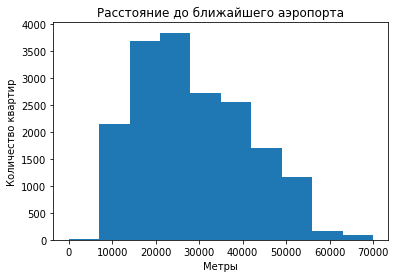

In [49]:
plt.hist(data['airports_nearest'], range=(0,70000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

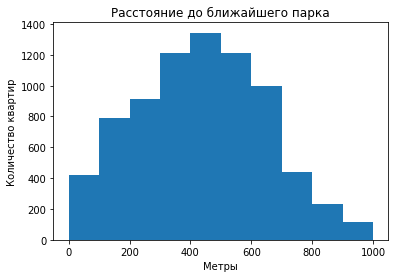

In [50]:
plt.hist(data['parks_nearest'], range=(0,1000))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()


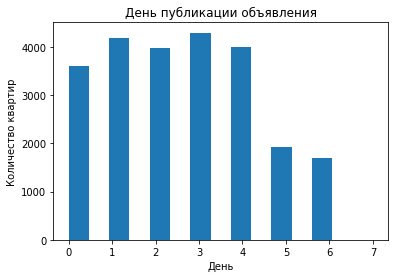

In [51]:
plt.hist(data['weekday'], bins = 15, range=(0,7))
plt.title('День публикации объявления')
plt.xlabel('День')
plt.ylabel('Количество квартир')
plt.show()

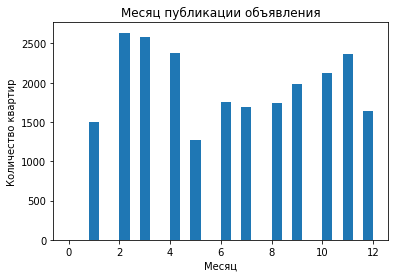

In [52]:
plt.hist(data['month'], bins = 30, range=(0,12))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: 
1. По общей площади: большинство квартир <60 м2, также встречаются варианты >150 м2, но их значительно меньше
   По жилой площади: у большинства объявлений жилая площадь составляет не более 35 кв.м., также есть единичные случаи - > 80м2
   По площади кухни: в среднем площадь кухни 5-10 м2, более 25 м2 - единичные случаи
2. Стоимость: наиболее распространенная стоимость объекта - 4-5 млн рублей
3. Количество комнат: самые популярные квартиры при продаже - однокомнатные, двухкомнатные и трехкомнатные. Есть варианты объектов >7 комнат, преположительно это частный дом
4. Высота потолков: средняя высота - 2,5-2,75
5. Этаж квартиры: в основном этаж не выше 10
   Тип этажа квартиры: большинство квартир не на первом и не на последнем этажах
   Общее количество этажей в доме: в среднем 5-10
6. Расстояние до центра города: большая часть объектов находится в пределах 15 км от центра
   Расстояние до ближайшего аэропорта: большая часть объектов находится в пределах 15-30 км от аэропорта
   Расстояние до ближайшего парка: в среднем - 500 м
7. День и месяц публикации объявления: наблюдается закономерность в публикации в будни, а именно с понедельника по четверг, и спад в начале, конца года и в мае

*2. Как быстро продавались квартиры*

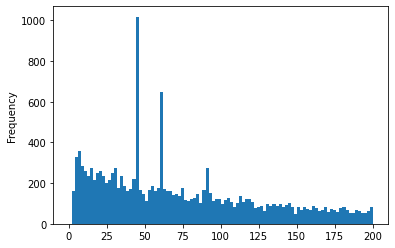

In [53]:
data['days_exposition'].plot(kind='hist', bins = 100,  range=(0,200));

In [54]:
round(data['days_exposition'].mean())

181

In [55]:
round(data['days_exposition'].median())

95

**Вывод:** 
на основании гистограммы и подсчета значений можно сказать, что в среднем продажа занимает 100 дней. 
Так как есть выбросы, мы видим, что есть сильная разница между средним значением и медианой. Быстрыми продажами можно считать продажи до месяца, необычно долгими - более полугода 

*3. Какие факторы влияют на общую стоимость объекта*

0.7305740618424812


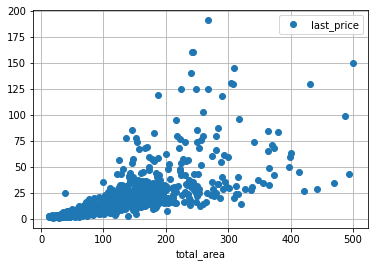

In [56]:
print(data['last_price'].corr(data['total_area']))
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o');

Зависимость между общей площадью и стоимостью прослеживается 

0.6468834697390042


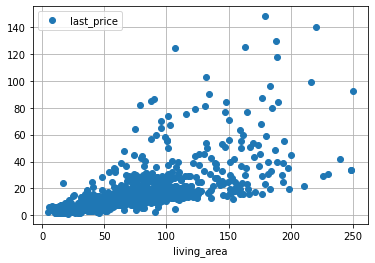

In [57]:
print(data['last_price'].corr(data['living_area']))
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o');

Зависимость между жилой площадью и стоимостью прослеживается

0.5595502994792043


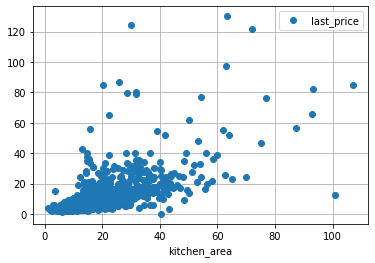

In [58]:
print(data['last_price'].corr(data['kitchen_area']))
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o');

Незначительная зависимость между площадью кухни и стоимостью прослеживается

0.4294947163408528


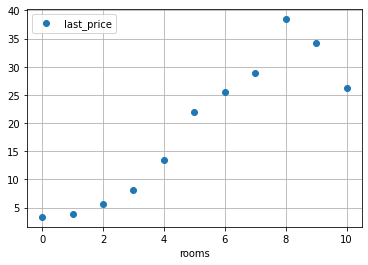

In [59]:
print(data['last_price'].corr(data['rooms']))
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o');

Зависимости между количеством комнат и стоимости нет

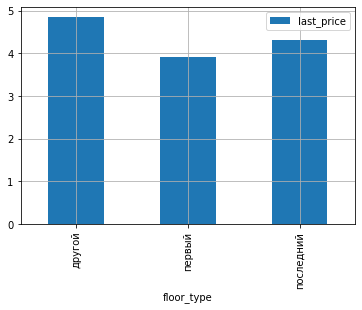

In [60]:
data.pivot_table(index='floor_type', values='last_price', aggfunc = 'median').plot.bar(grid=True, style='o');




По графику мы видим, зависимость незначительная

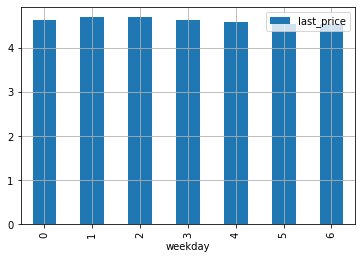

In [61]:
data.pivot_table(index='weekday', values='last_price', aggfunc = 'median').plot.bar(grid=True, style='o');


По графику мы видим, что день недели на стоимость не влияет

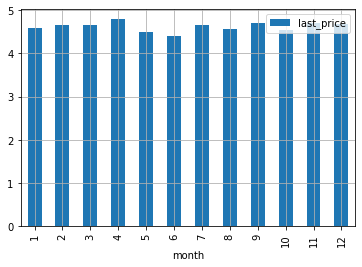

In [62]:
data.pivot_table(index='month', values='last_price', aggfunc = 'median').plot.bar(grid=True, style='o');

По графику мы видим, что месяц продажи на стоимость не влияет

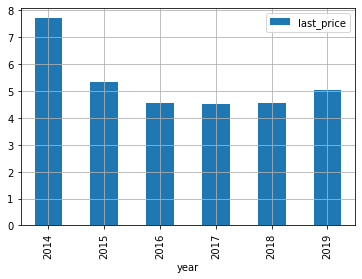

In [63]:
data.pivot_table(index='year', values='last_price', aggfunc = 'median').plot.bar(grid=True, style='o');

По графику мы видим, что в 2014 году был рост цен

*4. Зависимость цены от населенного пункта*

In [64]:
top_10 = data['locality_name'].value_counts().head(10)

In [65]:
sm_price = data.query('locality_name in (@top_10.index)').pivot_table(values='price_metr', index='locality_name')
sm_price = sm_price.sort_values('price_metr', ascending=False)
sm_price = sm_price.astype(int)
display(sm_price)

,price_metr
locality_name,
Санкт-Петербург,114234
Пушкин,103125
деревня Кудрово,92473
поселок Парголово,90175
поселок Мурино,85653
поселок Шушары,78677
Колпино,75424
Гатчина,68746
Всеволожск,68654


В результате вычислений: населеный пункт с самой высокой стоимостью - Санкт-Петербург, населеный пункт с самой низкой стоимостью - Выборг

*5. Зависимость цены от расстояния до центра*

In [66]:
avg_km = data.loc[data['locality_name']=='Санкт-Петербург'].pivot_table(index='center_distance', values='last_price', aggfunc={'mean'})
avg_km['mean'] = avg_km['mean']/1000000
display(avg_km)

,mean
center_distance,
0.0,0.000031
1.0,0.000018
2.0,0.000016
3.0,0.000011
4.0,0.000012
5.0,0.000013
6.0,0.000015
7.0,0.000015
8.0,0.000009


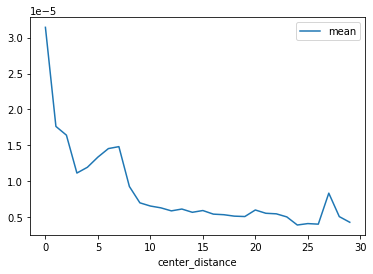

In [67]:
avg_km.plot();

На основании исследования можно сделать вывод, что чем больше расстояние от центра, тем стоимость объекта дешевле. Начиная с 9 км от центра и ближе цена сильно растет

### Общий вывод

В данном проекте я проанализировала предоставленные мне данные, устранила пролблемы связанные и пропущенными значениями, дубликатами и неправильно написанными столбцами, построила графики. На основанни этого провела исследовательский анализ:

1. большинство квартир в объявлениях имеют общую площадь не больше 60 кв.м., из которых жилая - 35 кв.м. и кухня 5-10 кв. м., потолки - 2,5-2,75, количество комнат - до 3
2. расположение квартир в основном не выше 10 этажа. Большая часть объектов находится в пределах 15 км от центра, в среднем в 20 км от аэропорта и 500 м от ближайщего парка 
3. средняя стоимость таких объектов 4-5 млн. руб.
4. день недели, месяц на стоимость не влияют, можно отметить только рост в 2014 году
5. в среднем квартиры продаются за 100 дней
6. город с самой высокой стоимостью за кв.м. - Санкт-Петербург (113891 руб.), а самой низкой -  Выборг (58319 руб.)
7. цена зависит от площади квартиры, а также от количества комнат (чем больше - тем дороже) и расстояние от центра (чем больше расстояние от центра, тем стоимость объекта дешевле).


